<a href="https://colab.research.google.com/github/AlejandroJuarez98/MLEARNING20/blob/master/CL04_Caso_de_estudio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importacióm de librerías.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [32]:
wine = load_wine() # Cargamos información de vinos
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names) # Transformamos información a objeto dataframe de Pandas (label: datos, features: Nombre de columnas)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
# Resumen de información del dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [34]:
# Obtener el número de valores nulos
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [35]:
X = wine_df # Variable X: Features -> Caracteristicas del conjunto de datos
Y = pd.Series(wine.target) # Variable Y: Labels -> Etiquetas del conjunto de datos (Malo, Regular y Bueno)
Y.unique() # Obtener tipos de datos sin repetición (Arreglo de etiquetas)

array([0, 1, 2])

In [36]:
Y.value_counts() # Conteo de valores por etiqueta

1    71
0    59
2    48
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


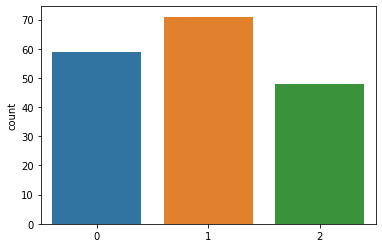

In [37]:
sns.countplot(Y)

In [38]:
# Division del dataframe en conjunto de entrenamiento y conjunto de prueba --> Objetivo: Evaluar efectividad del modelo.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Aplicamos Normalización de datos
sc = StandardScaler()
# Estandarizamos todos los datos de x entre un rango de valores
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)

[[ 0.45081858 -0.56984444  0.98300995 ... -0.14183135  0.85152214
   1.35677598]
 [ 0.98428724 -0.74638619  0.98300995 ...  0.80097091 -0.05125173
   1.1512983 ]
 [-0.39788155 -0.78169454 -0.39374262 ...  0.03775003 -0.75958201
  -0.8560605 ]
 ...
 [-0.88285305 -0.88761959 -1.46455017 ...  1.24992437  0.18485836
  -1.06786057]
 [ 1.311643   -0.34916725  0.14166116 ...  0.53159883  0.19874718
   0.93001466]
 [-0.68886445  0.54236858  1.0594962  ... -1.264215   -1.21791336
   0.36099956]]


In [39]:
#Creación de modelo - Random forest classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train) # Entrenamiento del modelo
pred_rfc = rfc.predict(x_test)

accuracy_score(y_test, pred_rfc)

1.0

In [40]:
##SVM (support vector machines) Classifier
clf = SVC()
clf.fit(x_train, y_train)
pred_clr = clf.predict(x_test)

accuracy_score(y_test, pred_clr)

1.0